## Detect the outliers

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("C:\\Users\\Faheem\\Downloads\\house_price.csv")
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [7]:
df.describe(include="all")

,location,size,total_sqft,bath,price,bhk,price_per_sqft
count,13200,13200,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
unique,241,31,NaN,NaN,NaN,NaN,NaN
top,other,2 BHK,NaN,NaN,NaN,NaN,NaN
freq,2872,5192,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,NaN,NaN,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,NaN,NaN,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,NaN,NaN,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,NaN,NaN,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,NaN,NaN,1672.000000,3.000000,120.000000,3.000000,7.317000e+03


In [8]:
df.notnull

<bound method DataFrame.notnull of                        location       size  total_sqft  bath   price  bhk  \
0      Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1              Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2                   Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3            Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                      Kothanur      2 BHK      1200.0   2.0   51.00    2   
...                         ...        ...         ...   ...     ...  ...   
13195                Whitefield  5 Bedroom      3453.0   4.0  231.00    5   
13196                     other      4 BHK      3600.0   5.0  400.00    4   
13197     Raja Rajeshwari Nagar      2 BHK      1141.0   2.0   60.00    2   
13198           Padmanabhanagar      4 BHK      4689.0   4.0  488.00    4   
13199              Doddathoguru      1 BHK       550.0   1.0   17.00    1   

       price_per_sqft  
0               

In [9]:
df.duplicated().sum()

1049

## To remove duplicate rows

In [11]:
df.drop_duplicates(inplace=True)
df.to_csv('modified_house_price.csv',index=False)
df_modified=pd.read_csv('modified_house_price.csv')
df_modified

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
12146,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
12147,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
12148,other,4 BHK,3600.0,5.0,400.00,4,11111
12149,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


In [12]:
df.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

In [13]:
df.isnull

<bound method DataFrame.isnull of                        location       size  total_sqft  bath   price  bhk  \
0      Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1              Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2                   Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3            Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                      Kothanur      2 BHK      1200.0   2.0   51.00    2   
...                         ...        ...         ...   ...     ...  ...   
13194         Green Glen Layout      3 BHK      1715.0   3.0  112.00    3   
13195                Whitefield  5 Bedroom      3453.0   4.0  231.00    5   
13196                     other      4 BHK      3600.0   5.0  400.00    4   
13197     Raja Rajeshwari Nagar      2 BHK      1141.0   2.0   60.00    2   
13198           Padmanabhanagar      4 BHK      4689.0   4.0  488.00    4   

       price_per_sqft  
0                

In [4]:
df.notnull

<bound method DataFrame.notnull of                        location       size  total_sqft  bath   price  bhk  \
0      Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1              Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2                   Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3            Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                      Kothanur      2 BHK      1200.0   2.0   51.00    2   
...                         ...        ...         ...   ...     ...  ...   
13195                Whitefield  5 Bedroom      3453.0   4.0  231.00    5   
13196                     other      4 BHK      3600.0   5.0  400.00    4   
13197     Raja Rajeshwari Nagar      2 BHK      1141.0   2.0   60.00    2   
13198           Padmanabhanagar      4 BHK      4689.0   4.0  488.00    4   
13199              Doddathoguru      1 BHK       550.0   1.0   17.00    1   

       price_per_sqft  
0               

In [5]:
df.shape

(13200, 7)

## Removing outliers using Mean function

In [4]:
df.price_per_sqft.min()

267

In [5]:
df.price_per_sqft.max()

12000000

In [6]:
df.price_per_sqft.mean()

7920.336742424242

In [7]:
df.price_per_sqft.median()

5438.0

Here outliers exists.

C:\Users\Faheem\AppData\Local\Temp\ipykernel_900\3254988551.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'],color='r')


Text(0.5, 1.0, 'Distribution of price per sqft with Outliers')

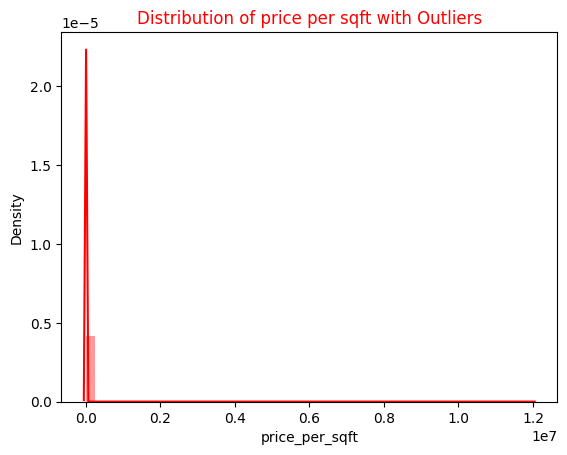

In [9]:
sns.distplot(df['price_per_sqft'],color='r')
plt.title('Distribution of price per sqft with Outliers',color='r')

<Axes: ylabel='price_per_sqft'>

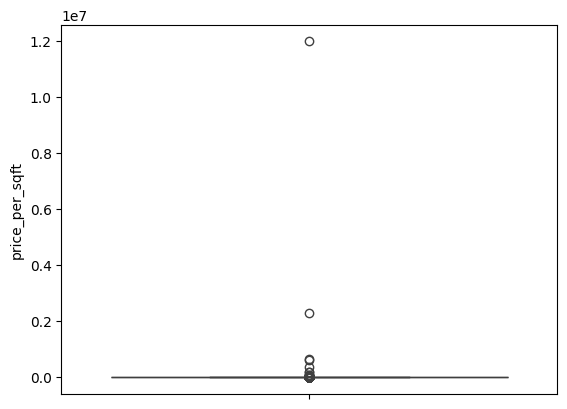

In [10]:
sns.boxplot(df['price_per_sqft'])

In [11]:
df.price_per_sqft.quantile([0.05,0.1,0.25,0.5,0.75,0.90,0.92,0.94,0.96,0.98,0.99])

0.05     3107.85
0.10     3500.00
0.25     4267.00
0.50     5438.00
0.75     7317.00
0.90    11666.00
0.92    12857.00
0.94    14394.80
0.96    16500.00
0.98    20000.00
0.99    23674.45
Name: price_per_sqft, dtype: float64

## Here a significant variation between 98 & 99 percentile,this indicate a presence of outliers.

In [12]:
df[df.price_per_sqft>df.price_per_sqft.quantile(0.95)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
48,KR Puram,2 Bedroom,800.0,1.0,130.0,2,16250
69,other,3 Bedroom,500.0,3.0,100.0,3,20000
...,...,...,...,...,...,...,...
13142,other,2 BHK,1140.0,1.0,185.0,2,16228
13157,other,7 Bedroom,1400.0,7.0,218.0,7,15571
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000
13186,other,4 Bedroom,1200.0,5.0,325.0,4,27083


In [13]:
df1=df[df.price_per_sqft<df.price_per_sqft.quantile(0.95)]
df1

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


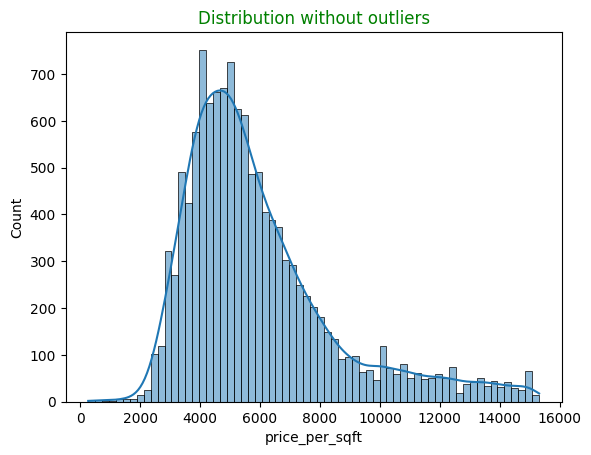

In [14]:
sns.histplot(df1.price_per_sqft,kde=True)
plt.title('Distribution without outliers',color='g')
plt.show()

<Axes: ylabel='price_per_sqft'>

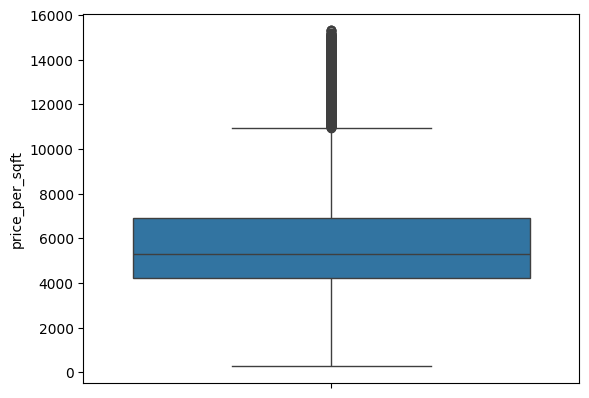

In [15]:
sns.boxplot(df1['price_per_sqft'])

In [16]:
print("Before removing outliers:",len(df))
print("After removing outliers:",len(df1))
print("Outliers:",len(df)-len(df1))

Before removing outliers: 13200
After removing outliers: 12540
Outliers: 660


## we have removed 609 ouliers from the dataset using mean function

## 2.Percentile method

In [19]:
upper_limit=df['price_per_sqft'].quantile(0.95)
lower_limit=df['price_per_sqft'].quantile(0.05)

In [20]:
print("Upper Limit:",upper_limit)
print("Lower Limit:",lower_limit)

Upper Limit: 15312.099999999984
Lower Limit: 3107.8500000000004


C:\Users\Faheem\AppData\Local\Temp\ipykernel_900\3819253537.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'],color='r')


Text(0.5, 1.0, 'Distribution of Price Per Sqft with Outliers')

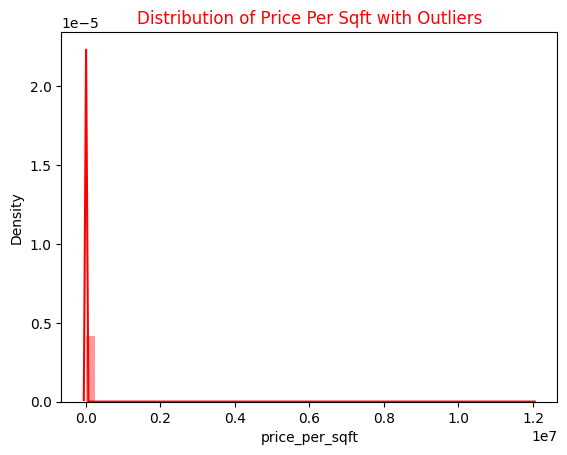

In [22]:
sns.distplot(df['price_per_sqft'],color='r')
plt.title('Distribution of Price Per Sqft with Outliers',color='r')

<Axes: ylabel='price_per_sqft'>

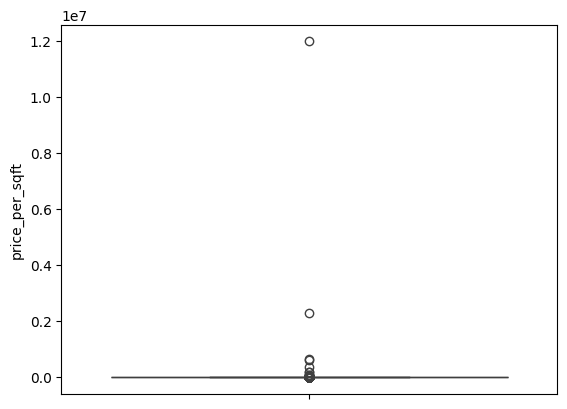

In [24]:
sns.boxplot(df['price_per_sqft'])

In [25]:
#finding outliers
df.loc[(df['price_per_sqft']>upper_limit) | (df['price_per_sqft']<lower_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
20,Kengeri,1 BHK,600.0,1.0,15.0,1,2500
41,Sarjapur Road,3 BHK,1254.0,3.0,38.0,3,3030
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
...,...,...,...,...,...,...,...
13157,other,7 Bedroom,1400.0,7.0,218.0,7,15571
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000
13186,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13191,Ramamurthy Nagar,7 Bedroom,1500.0,9.0,250.0,7,16666


In [26]:
#deleting the outliers
df2=df.loc[(df['price_per_sqft']<=upper_limit) & (df['price_per_sqft']>=lower_limit)]
df2

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


In [27]:
print("Before removing outliers:",len(df))
print("After removing outliers:",len(df2))
print("Outliers:",len(df)-len(df2))

Before removing outliers: 13200
After removing outliers: 11880
Outliers: 1320


C:\Users\Faheem\AppData\Local\Temp\ipykernel_900\4189484675.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['price_per_sqft'],color='b')


Text(0.5, 1.0, 'Distribution of Price Per Sqft without outliers')

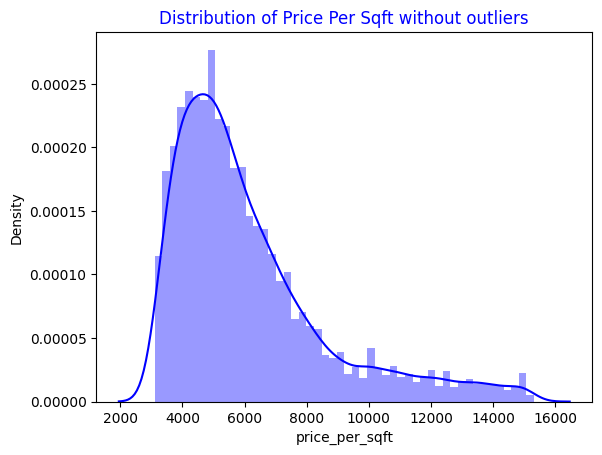

In [29]:
sns.distplot(df2['price_per_sqft'],color='b')
plt.title('Distribution of Price Per Sqft without outliers',color='b')

<Axes: ylabel='price_per_sqft'>

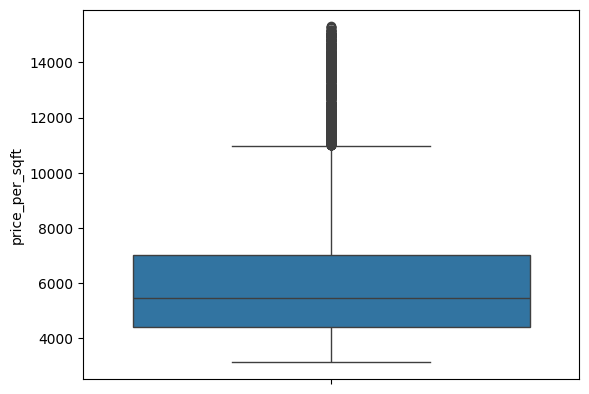

In [30]:
sns.boxplot(df2['price_per_sqft'])

In [31]:
#CAPPING -cahne the outliers to upper or lower values
new_df2=df.copy()
new_df2.loc[(new_df2['price_per_sqft']>upper_limit),'price_per_sqft']=upper_limit
new_df2.loc[(new_df2['price_per_sqft']<lower_limit),'price_per_sqft']=lower_limit

C:\Users\Faheem\AppData\Local\Temp\ipykernel_900\127135985.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '15312.099999999984' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_df2.loc[(new_df2['price_per_sqft']>upper_limit),'price_per_sqft']=upper_limit


<Axes: ylabel='price_per_sqft'>

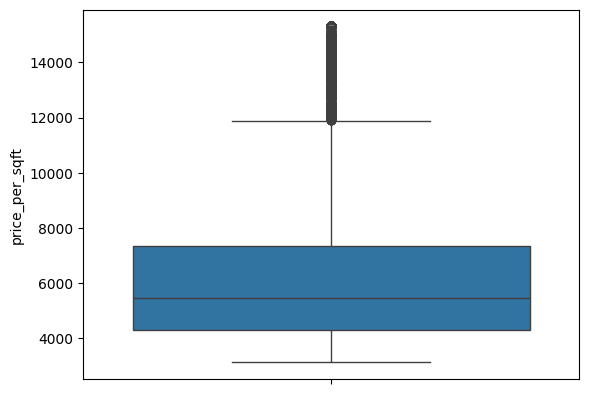

In [32]:
sns.boxplot(new_df2['price_per_sqft'])

## 3.IQR(Inter quartile range method)

C:\Users\Faheem\AppData\Local\Temp\ipykernel_900\1584638660.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


Text(0.5, 1.0, 'Distribution of price Per Sqft with outliers')

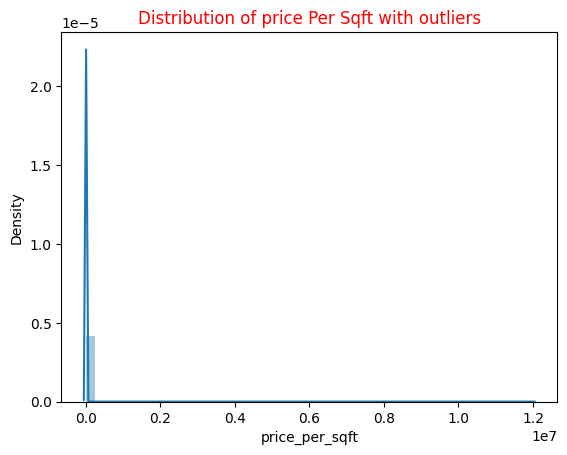

In [34]:
sns.distplot(df['price_per_sqft'])
plt.title('Distribution of price Per Sqft with outliers',color='r')

<Axes: ylabel='price_per_sqft'>

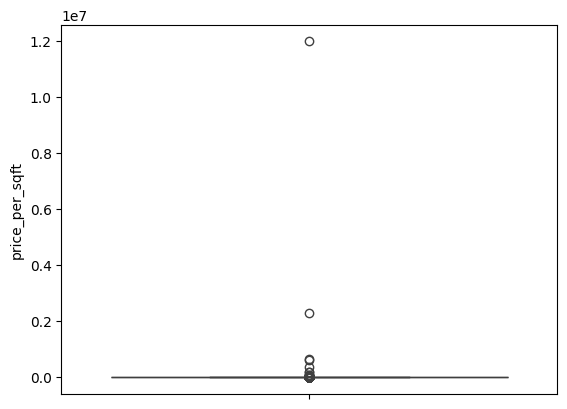

In [35]:
sns.boxplot(df['price_per_sqft'])

In [36]:
Q1=df.price_per_sqft.quantile(0.25)
Q3=df.price_per_sqft.quantile(0.75)
IQR=Q3-Q1
print("Q1=",Q1)
print("Q3=",Q3)
print("IQR=",IQR)

Q1= 4267.0
Q3= 7317.0
IQR= 3050.0


In [37]:
lower_whisker=Q1-1.5*IQR
upper_whisker=Q3+1.5*IQR
print('Lower Whisker=',lower_whisker)
print('Upper Whisker=',upper_whisker)

Lower Whisker= -308.0
Upper Whisker= 11892.0


In [38]:
#finding otuliers
df[(df.price_per_sqft<-308.0) | (df.price_per_sqft>12184.5)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
22,Thanisandra,4 Bedroom,2800.0,5.0,380.0,4,13571
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
48,KR Puram,2 Bedroom,800.0,1.0,130.0,2,16250
...,...,...,...,...,...,...,...
13142,other,2 BHK,1140.0,1.0,185.0,2,16228
13157,other,7 Bedroom,1400.0,7.0,218.0,7,15571
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000
13186,other,4 Bedroom,1200.0,5.0,325.0,4,27083


In [39]:
#df without outliers
df3=df[(df.price_per_sqft>-308.0) & (df.price_per_sqft<12184.5)]
df3

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [40]:
print('Before removing outliers:',len(df))
print('After removing outliers',len(df3))
print('Outliers:',len(df)-len(df3))

Before removing outliers: 13200
After removing outliers 12017
Outliers: 1183


C:\Users\Faheem\AppData\Local\Temp\ipykernel_900\1505506807.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3['price_per_sqft'],color='b')


Text(0.5, 1.0, 'Distribution of Price Per Sqft without outliers')

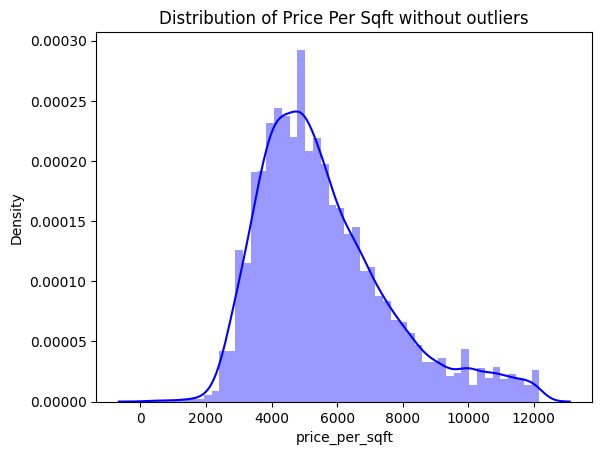

In [42]:
sns.distplot(df3['price_per_sqft'],color='b')
plt.title('Distribution of Price Per Sqft without outliers')

<Axes: ylabel='price_per_sqft'>

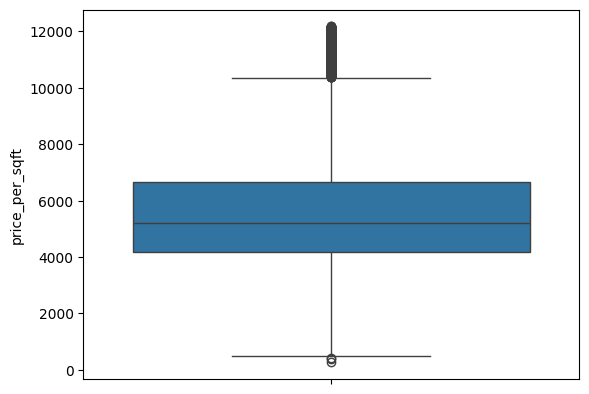

In [43]:
sns.boxplot(df3['price_per_sqft'])

## removed 1142 outliers from the dataset.

## 4.Normal distribution

In [44]:
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [45]:
mean=df.price_per_sqft.mean()
mean

7920.336742424242

In [46]:
sd=df.price_per_sqft.std()
sd

106727.16032810867

In [47]:
#-3sigma
mean-3*sd

-312261.14424190175

In [48]:
#+3sigma
mean+3*sd

328101.8177267502

In [49]:
#finding outliers
df[(df.price_per_sqft<-325566.06084694766) | (df.price_per_sqft>341831.3445273032)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333


In [50]:
#data without outliers
df4=df[(df.price_per_sqft>-325566.06084694766) & (df.price_per_sqft<341831.3445273032)]
df4

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [51]:
print("Before removing outliers:",len(df))
print("After removing outliers:",len(df4))
print("Outliers:",len(df)-len(df4))

Before removing outliers: 13200
After removing outliers: 13195
Outliers: 5


C:\Users\Faheem\AppData\Local\Temp\ipykernel_900\2982534691.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df4['price_per_sqft'],color='r')


<Axes: xlabel='price_per_sqft', ylabel='Density'>

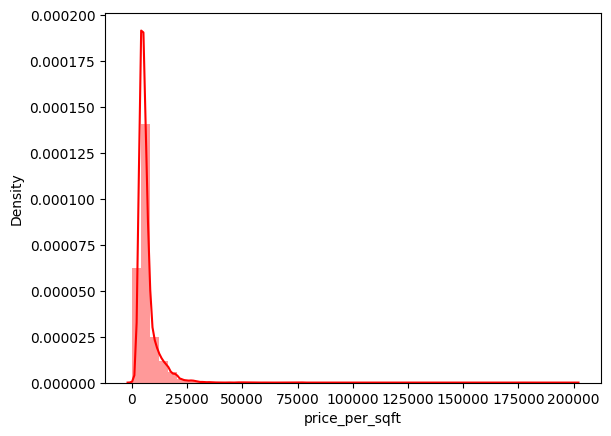

In [53]:
sns.distplot(df4['price_per_sqft'],color='r')

<Axes: ylabel='price_per_sqft'>

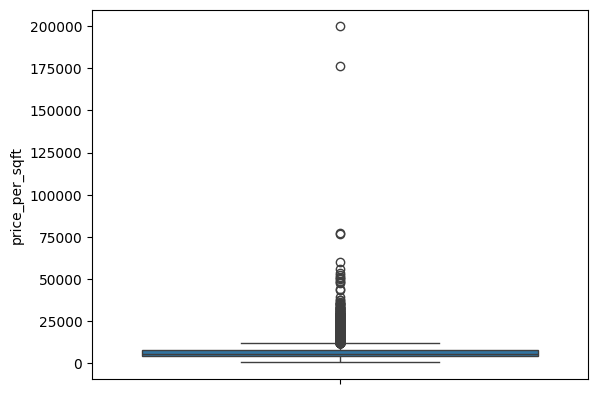

In [54]:
sns.boxplot(df4['price_per_sqft'])

## 5.Zscore method

In [55]:
mean=df.price_per_sqft.mean()
mean

7920.336742424242

In [56]:
std=df.price_per_sqft.std()
std

106727.16032810867

In [57]:
lower_limit = mean-3*std
lower_limit

-312261.14424190175

In [58]:
upper_limit = mean+3*std
upper_limit

328101.8177267502

In [59]:
df5=df.loc[(df.price_per_sqft<=upper_limit) & (df.price_per_sqft>=lower_limit)]
df5

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [60]:
print("Before Removing Outliers:",len(df))
print("After Removing Outliers:",len(df5))
print("Outliers:",len(df)-len(df5))

Before Removing Outliers: 13200
After Removing Outliers: 13195
Outliers: 5


C:\Users\Faheem\AppData\Local\Temp\ipykernel_900\1070500171.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df5['price_per_sqft'],color='r')


<Axes: xlabel='price_per_sqft', ylabel='Density'>

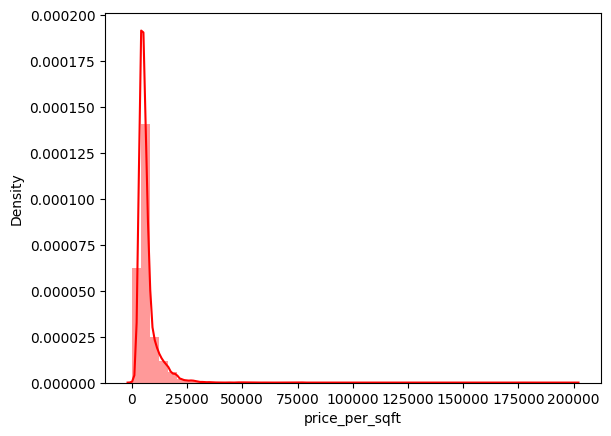

In [61]:
sns.distplot(df5['price_per_sqft'],color='r')

<Axes: ylabel='price_per_sqft'>

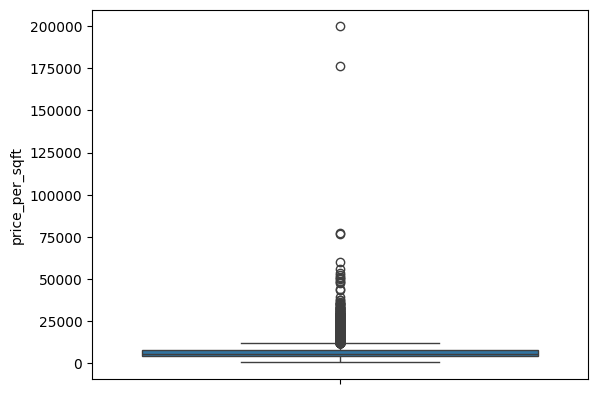

In [62]:
sns.boxplot(df5['price_per_sqft'])

## Using the zscore method, there were 12,151 data rows before removing outliers, and 12,146 data rows after removal, indicating a total of 5 outliers..

## Correlation between all the numerical columns

In [63]:
#finding the numerical columns
#checking the dataset and selecting the numerical columns
num_col=df.select_dtypes(include=['int', 'float']).columns
num_col

Index(['total_sqft', 'bath', 'price', 'bhk', 'price_per_sqft'], dtype='object')

In [64]:
#compute correlation mathrix
corre_matrix=df[num_col].corr()


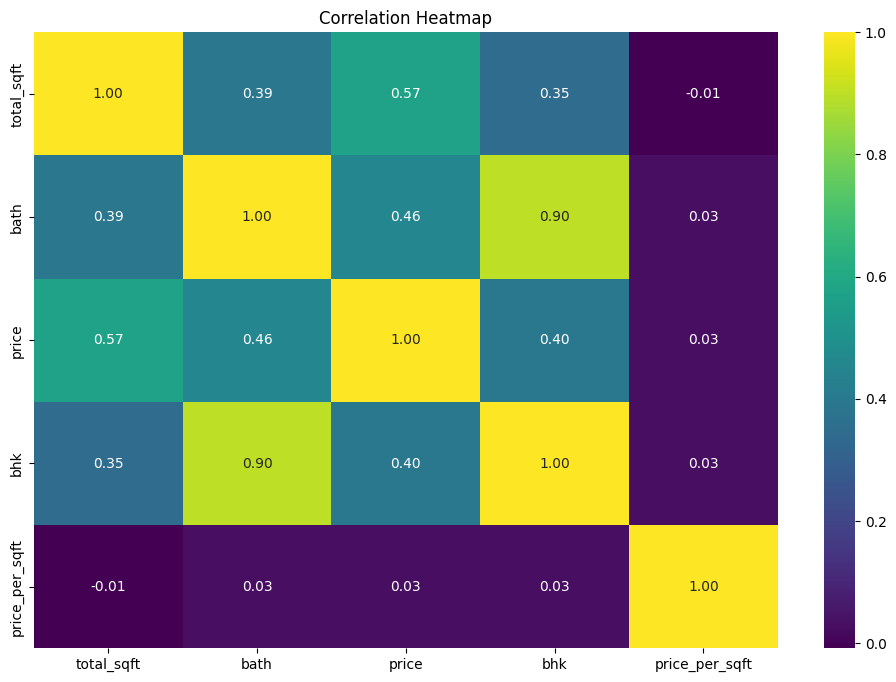

In [66]:
#plotting heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corre_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

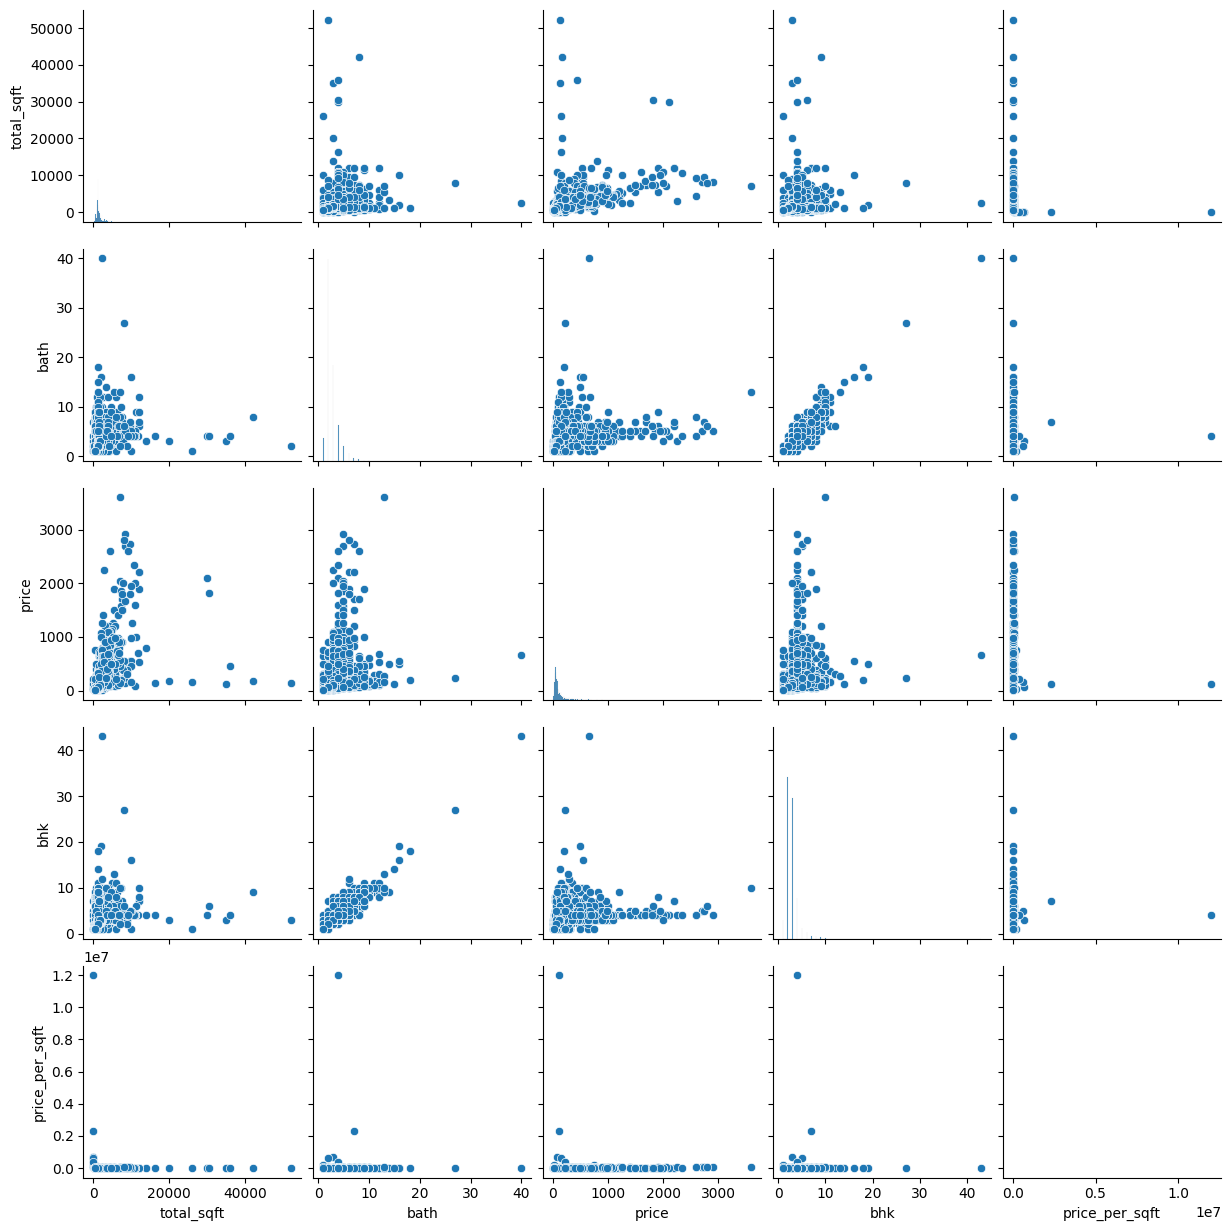

In [67]:
#plot scatterplot
sns.pairplot(df)
plt.show()

## 1. Total Square Footage and Bathrooms Correlation:
The total square footage of a house demonstrates a robust positive correlation with both the number of bathrooms and the price. The correlation coefficients for with bathrooms and price stand at approximately 0.62 and 0.45, respectively. This implies that larger houses tend to accommodate more bathrooms and command higher prices.

# 2. Bathrooms and Price Relationship:
 The number of bathrooms also exhibits a moderately positive correlation with the price, with a coefficient of 0.35. This suggests that houses featuring more bathrooms generally carry higher price tags.

## 3. Bedrooms Correlation:
Conversely, the number of bedrooms displays a relatively weaker positive correlation with total square footage (0.47), bathrooms (0.60), and price (0.29). This indicates that while larger houses may boast more bedrooms, the number of bedrooms isn't as closely linked to overall size or price as the number of bathrooms.

## 4. Price per Square Foot Correlations:
 The price per square foot demonstrates moderate positive correlations with various features, ranging from 0.22 to 0.32. This implies that factors such as total size, number of bathrooms, and number of bedrooms influence the price per square foot, albeit with correlations that are not exceedingly strong.

## 5. Heatmap Insights:
Overall, the heatmap effectively illustrates the relationships between different house features. Notably, total square footage and the number of bathrooms emerge as having the most pronounced positive correlations with price.